<h1><center> Principal Component Analysis </center></h1>
<h3><center> Cristian Lazo Quispe </center></h3>

---

##### In an astronomical observation, researchers used 17 different bands of the spectrum to analyze 4 celestial objects. Using the PCA find out which of the 4 celestial objects does not behave like a star.

# Import libraries

In [5]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10,10]
warnings.filterwarnings("ignore")


# Read dataset

In [6]:
df = pd.read_excel('PCA_exercise 1.xlsx',header=0,index_col=0)
df = df[['Object '+str(i) for i in range(1,5)]]
#df = df[['Object '+str(i) for i in [1,3,4]]]
df.head()

,Object 1,Object 2,Object 3,Object 4
Band 1,375,135,458,475
Band 2,57,47,53,73
Band 3,245,267,242,227
Band 4,1472,1494,1462,1582
Band 5,105,66,103,103


# Solution

#### My interpretation
- My understanding to the problem is that we need to get the Object with less correlation with other Objects, because if the objects behave like a star their values in Bands will have high correlation.
- In base of the theory PCA, it express the data with a linear combination of basis vectors, minimizing the redundancy(covariance) and maximizing the variance. 
    - We can use that redundancy because the value that not has the behave like a start has low linear relationship with the others (min eigvalue)
    - The objects that behave like a star are values with high redundacy because they should have high linear relationship


#### Create pca function

- I use the algebra solution using singular value descomposition (SVD) explained in this article:
https://www.cc.gatech.edu/~lsong/teaching/CX4240spring16/pca_schlens.pdf

In [7]:
class my_pca:
    def __init__(self,n_components=None):
        self.n_components=n_components
    def fit(self,df):
        if self.n_components is None:
            self.n_components = df.shape[1]
        # subtract the mean of each dimension
        self.mn = np.mean(df,0)
        new_matrix = df - self.mn
        # get the covariance matrix
        self.covariance_matrix = np.cov(new_matrix.T)#new_matrix.T.dot(new_matrix) / (new_matrix.shape[0]-1)
        # get principal components of data
        self.eigenvalues,self.eigenvectors= np.linalg.eig(self.covariance_matrix)
        # get decrease order
        val=(-self.eigenvalues).argsort()
        # linear transformation matrix 
        self.components_ =  self.eigenvectors[...,val].T[:self.n_components]
        # eigenvalues ordered
        self.explained_variance_ = self.eigenvalues[...,val][:self.n_components]
        
    def transform(self,df):
        new_matrix = df - self.mn
        new_dimension_matrix = np.dot(self.components_[:self.n_components],new_matrix.T)
        newData = new_dimension_matrix.T
        return newData

#### Comparate my function with scikit-learn library 

In [8]:
df_std = StandardScaler().fit_transform(df)

In [9]:
# sklearn solution
pca = PCA(n_components=2)
pca.fit(df_std)
print('Points')
print(pca.transform(df_std)[0])
print('Linear transformation matrix')
print(pca.components_[0:2])
print('eigvalues')
print(pca.explained_variance_)


Points
[-0.45556594  0.46623859]
Linear transformation matrix
[[ 0.50526231  0.49247225  0.50094821  0.50123046]
 [ 0.27858192 -0.86738491  0.22784545  0.34368879]]
eigvalues
[4.12556937 0.08206434]


In [10]:
# MY Solution
pca = my_pca(n_components=2)
pca.fit(df_std)
print('Points')
print(pca.transform(df_std)[0])
print('Linear transformation matrix')
print(pca.components_[0:2])
print('eigvalues')
print(pca.explained_variance_)


Points
[-0.45556594 -0.46623859]
Linear transformation matrix
[[ 0.50526231  0.49247225  0.50094821  0.50123046]
 [-0.27858192  0.86738491 -0.22784545 -0.34368879]]
eigvalues
[4.12556937 0.08206434]


##### My implementation work well with similar results

### Find the celestial object does not have behave like a star

In [11]:
# MY Solution
pca = my_pca()
pca.fit(df_std)
print('eigvalues :')
eigenvalues = pca.eigenvalues
print(eigenvalues)
print('Object %s has minimal correlation'%(eigenvalues.argmin()+1))

eigvalues :
[4.12556937 0.00416802 0.08206434 0.03819827]
Object 2 has minimal correlation


#### Like my interpretation said, the object with minimal redundancy (correlation linear with others) is the value that has different behavior with the low eignvalue

- This hyphotesis is right because we assume that all features have the same behavior
- Object 2 does not behave like a star

# Plot correlation matrix to prove the solution

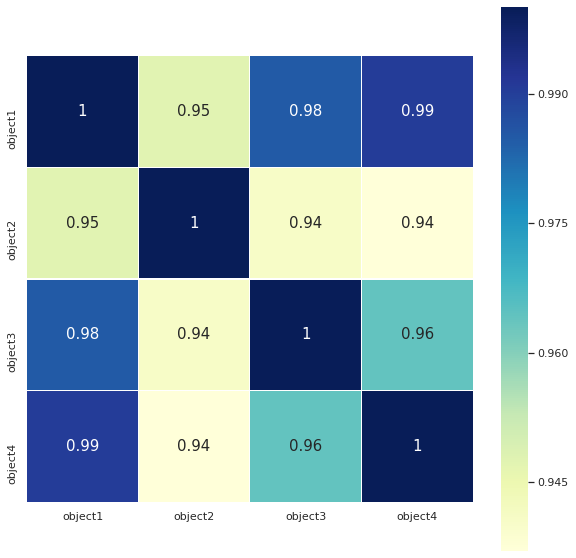

In [23]:
corrMatrix = np.corrcoef(df_std.T)
names = ['object'+str(i+1) for i in range(0,4) ]
sns.heatmap(corrMatrix, vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, 
            annot=True, annot_kws={"fontsize":15}, xticklabels=names, yticklabels=names)  

plt.show()

    - As you can appreciate the Object 2 has the minimal correlation with others values


## Plot the variance explained ratios of the eigenvalues. 

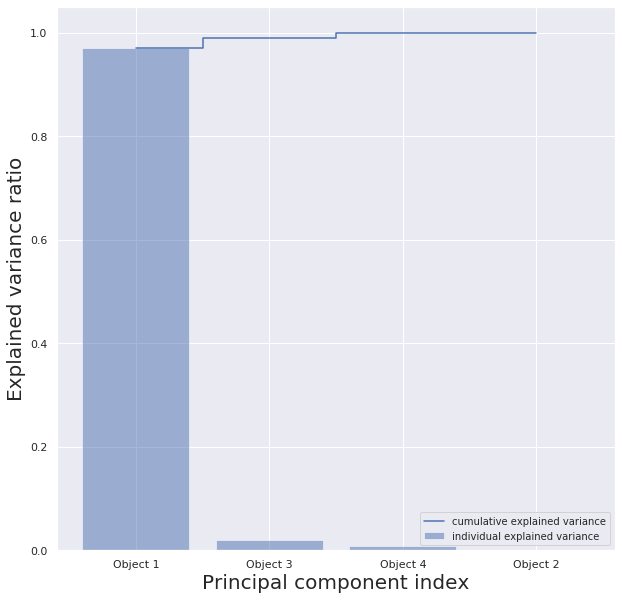

In [26]:
# calculate cumulative sum of explained variances

tot = sum(eigenvalues)
var_exp = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
val=(-eigenvalues).argsort()
names = ['Object '+str(i+1) for i in val ]

# plot explained variances
plt.bar(names, var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(names, cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize=20)
plt.xlabel('Principal component index', fontsize=20)
plt.legend(loc='best',prop={'size': 10})
plt.show()

The resulting plot indicates that the first principal component alone accounts for approximately 90% of the variance. Also, we can see that the first three principal components combined explain almost 100% of the variance in the dataset.

# Answer

###  Object 2 does not behave like a star